In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('../input/auto-mpg.csv')

## About the Data

CSV source: https://www.kaggle.com/uciml/autompg-dataset

Can also be found on the UCI Machine Learning Repository

**From UCI ML Repository**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". 

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

## Data Dictionary
|Attribute|Description|
|-|-|
|mpg|Miles per gallon. Continuous variable|
|cylinders|Number of cylinders in the engine|
|displacement|Total swept volume displacement of engine through 1 cycle (Commonly used in cm<sup>3</sup>)|
|horsepower|Unit of power. Often abbreviated as hp. 1 hp is equivalent to around 750 watts|
|weight|Weight of the car, in pounds|
|acceleration|Assumed to be the time it takes for the vehicle to accelerate from 0 to 60 miles per hour (mph)|
|model year|Year of manufacture|
|origin|1 = North America. 2 = Europe, 3 = Japan/Asia|
|car name|Make and model of the car|

### Descriptive Stats & Sanity Check

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

Horsepower is regarded as an object. Will check later

In [ ]:
data.describe()

In [ ]:
# Check for any null values
data.isnull().any()

## Data Transformation and Cleaning

In [ ]:
# Splits car name in to manufacturer and model
data['manufacturer'],data['model']=data['car name'].str.split(' ',1).str

In [ ]:
# Change it so that the model year corresponds with the appropriate year in the 1900
data['model year']=1900+data['model year']

In [ ]:
# Validation of above transformations
data.sample(5)

In [ ]:
# Check for NaNs after the transformation
data.isnull().any()

In [ ]:
# Hunting the null value
data_null = data[data.isnull().any(axis=1)]
print(data_null)

2 null values occurred after the slicing of the car name - both by Subaru albeit in other years.

The car models does not have any major effect upon any future work, so they'll be left in. After all, mpg, cylinders, displacement etc are more important to future ML algorithms than the model.

In [ ]:
# Look at unique manufacturer names
orig_1_manufacturer = set() # Blank sets
orig_2_manufacturer = set() # Blank sets
orig_3_manufacturer = set() # Blank sets

for row in data.loc[data.origin == 1].manufacturer:
    orig_1_manufacturer.add(row)
    
for row in data.loc[data.origin == 2].manufacturer:
    orig_2_manufacturer.add(row)
    
for row in data.loc[data.origin == 3].manufacturer:
    orig_3_manufacturer.add(row)

print("North American manufacturers")
print(orig_1_manufacturer)
print("\nEuropean manufacturers")
print(orig_2_manufacturer)
print("\nAsian\\Japanese manufacturers")
print(orig_3_manufacturer)

For Origin == 1, we see a spelling error, where 'chevrolet' was entered as 'chevroelt'. There also is this 'hi' brand, which is new.

For Origin 2, 'vw' pops out. As VW is the standard abbreviation for Volkswagen, it stands to reason that it was incorrectly labeled. Another incorrect spelling of vokswagen can also be seen.

For Origin 3, mazda was incorrectly entered as maxda. Toyouta should be toyota.
In summary, three spelling errors to take care of.

In [ ]:
# Create a map of incorrect spellings
incorrect_to_correct = {'maxda':'mazda','vw':'volkswagen','chevroelt':'chevrolet', 'toyouta':'toyota','vokswagen':
                       'volkswagen'}

# Replace the incorrect values with the map
data.replace({'manufacturer':incorrect_to_correct},inplace=True)

In [ ]:
# Let's double check on the incorrect spellings
print(data[data['manufacturer'] == 'maxda'])
print(data[data['manufacturer'] == 'vw'])
print(data[data['manufacturer'] == 'chevroelt'])
print(data[data['manufacturer'] == 'toyouta'])
print(data[data['manufacturer'] == 'vokswagen'])

Empty dataframes means that the spellings are now correct.

One other interesting note is the use of Chevy and Chevrolet as car manufacturers. Historically, Chevrolet cars have also been referred to as Chevy colloquially. As such, this will be corrected in order for future work.

In [ ]:
incorrect_to_correct = {'chevy':'chevrolet'}
data.replace({'manufacturer':incorrect_to_correct},inplace=True)

In [ ]:
print(data[data['manufacturer'] == 'chevy'])

In [ ]:
# Let's go a little deeper than make and into models
# Count the entries by manufacturer
orig_1_model = set() # Blank sets
orig_2_model = set() # Blank sets
orig_3_model = set() # Blank sets

for row in data.loc[data.origin == 1].model:
    orig_1_model.add(row)
    
for row in data.loc[data.origin == 2].model:
    orig_2_model.add(row)
    
for row in data.loc[data.origin == 3].model:
    orig_3_model.add(row)

print("North American modelss")
print(orig_1_model)
print("\nEuropean modelss")
print(orig_2_model)
print("\nAsian\\Japanese models")
print(orig_3_model)

In [ ]:
# Actual numbers of model by region
print("North American manufacturers")
print(len(orig_1_model))
print("\nEuropean manufacturers")
print(len(orig_2_model))
print("\nAsian\\Japanese manufacturers")
print(len(orig_3_model))

Considering that the dataframe contains more North American manufacturers than other regions, it stands to reason that there will be more North American models. This can be observed in the next section, which is Exploratory Data Analysis.

In [ ]:
# Here we can see that horsepower is regarded as an object when it should be an integer, or float.
data.info()

In [ ]:
# All horsepower values should be floats or integers

# Find all non-numerical values in horsepower
data[data['horsepower'].str.contains(u'\D')]

All values here are according to www.automobile-catalog.com

According to the Automobile Catalog, each car had several versions/submodels available. As such, we attempted to match the listed charastics here (mpg, displacement, weight) with Automobile Catalog entries.

|Row | Car Name | Horsepower (hp) |
|-|-|
|32|<center>Ford Pinto 1971</center>|<center>75</center>|
|126|<center>Ford Maverick 1974</center>|<center>85</center>|
|330|<center>Renault Lecar Deluxe 1980</center>|<center>51</center>|
|336|<center>Ford Mustang Cobra 1980</center>|<center>120</center>|
|354|<center>Renault 19i 1981</center>|<center>74</center>|
|374|<center>AMC Concord dl 1982</center>|<center>82</center>|

There are some conflicts with the reported values, as other websites may have higher or lower hp listed. If there was no better match between 2-3 listings, an average value was aggregated.

In [ ]:
# Setting the value for Ford Pinto 1971
data.set_value(32,'horsepower',75)
# Setting the value for Ford Maverick 1974
data.set_value(126,'horsepower',85)
# Setting the value for Renault Lecar Deluxe 1980
data.set_value(330,'horsepower',51)
# Setting the value for Ford Mustang Cobra 1980
data.set_value(336,'horsepower',120)
# Setting the value for Renault 19i 1981
data.set_value(354,'horsepower',74)
# Setting the value for AMC Concord dl 1982
data.set_value(374,'horsepower',82)

print("Checking the Ford Pinto data")
print(data.loc[32])
print("\nChecking the AMC Concord data")
print(data.loc[374])

In [ ]:
# Cast horsepower to integer
data['horsepower'] = data.horsepower.astype(int)

In [ ]:
# Confirmation
data.info()

## EDA

Let's take a look at car model counts by region.

In [ ]:
plt.hist(data['origin'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title(u'Counts of models by region')
plt.xticks(range(1,4))
plt.show()

There is a disproportionate number of cars from North America, although it stands to reason as the study was originally conducted in North America, along with more car manufacturers in North America.

Given the number of car models, producing a histogram of car models will not be very beneficial. 

In [ ]:
# Maybe cars by year next?
plt.hist(data['model year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(u'Counts of models by year')
plt.show()

Here, we are observing the various other continuous variables provided in the dataframe.

In [ ]:
# Generate a feature list to iterate in a for loop
feat_list = data.columns.tolist()
# These columns are dropped from the feature list
# Some are categorical, some cover a range of values that will be similar
feat_list.remove('manufacturer')
feat_list.remove('model')
feat_list.remove('model year')
feat_list.remove('origin')
feat_list.remove('car name')
print(feat_list)

North American manufacturers
{'buick', 'chrysler', 'chevy', 'ford', 'plymouth', 'oldsmobile', 'pontiac', 'amc', 'chevroelt', 'hi', 'dodge', 'capri', 'chevrolet', 'mercury', 'cadillac'}

European manufacturers
{'bmw', 'mercedes-benz', 'renault', 'opel', 'peugeot', 'vokswagen', 'volkswagen', 'saab', 'audi', 'volvo', 'vw', 'fiat', 'triumph', 'mercedes'}

Asian\Japanese manufacturers
{'toyota', 'datsun', 'mazda', 'subaru', 'toyouta', 'nissan', 'honda', 'maxda'}


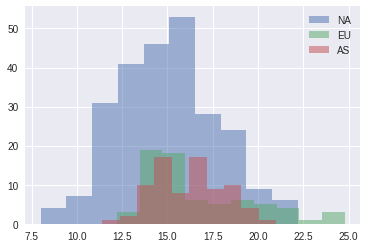

In [ ]:
# Run a for loop for histograms

# # Split it into 3 dataframes
# data_na = data[data['origin']==1]
# data_eu = data[data['origin']==2]
# data_asia = data[data['origin']==3]

# Divide the dataframe into 3 traces by region
# Plotly doesn't work, have to use Matplotlib
for cols in feat_list:
    print(cols)
    x0 = data[data["origin"] == 1][cols].values
    x1 = data[data['origin']==2][cols].values
    x2 = data[data['origin']==3][cols].values
    
    plt.hist(x0, alpha=0.5,label='NA')
    plt.hist(x1, alpha=0.5,label='EU')
    plt.hist(x2, alpha=0.5,label='AS')
    plt.legend(loc='upper right')
    
    plt.show()

There are some observable trends here. For mpg, North American cars typically are lower than European or Asian models. North America has a larger number of cars with more cylinders, as well as higher displacement. There is a larger range in horsepower, as well as weight. Acceleration, on the other hand, appears to be very similar.